In [1]:
import pandas as pd
data=pd.read_csv("/content/Netflix Stock Price  - Sheet1.csv")
data

,Date,Open,High,Low,Close,Volume
0,02/01/2019 16:00:00,259.28,269.75,256.58,267.66,11679528
1,03/01/2019 16:00:00,270.20,275.79,264.43,271.20,14969647
2,04/01/2019 16:00:00,281.88,297.80,278.54,297.57,19330102
3,07/01/2019 16:00:00,302.10,316.80,301.65,315.34,18620116
4,08/01/2019 16:00:00,319.98,320.59,308.01,320.27,15359180
...,...,...,...,...,...,...
1003,23/12/2022 16:00:00,296.18,298.46,291.91,294.96,4251108
1004,27/12/2022 16:00:00,293.19,293.57,282.13,284.17,5778098
1005,28/12/2022 16:00:00,281.92,285.19,273.41,276.88,5964369
1006,29/12/2022 16:00:00,283.18,295.50,281.01,291.12,9588527


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1008 non-null   object 
 1   Open    1008 non-null   float64
 2   High    1008 non-null   float64
 3   Low     1008 non-null   float64
 4   Close   1008 non-null   float64
 5   Volume  1008 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 47.4+ KB


In [3]:
data['Date']=pd.to_datetime(data['Date'],dayfirst=True)
data.set_index('Date',inplace=True)
print(data.isnull().sum())

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


MAX CLOSING STOCK PRICE

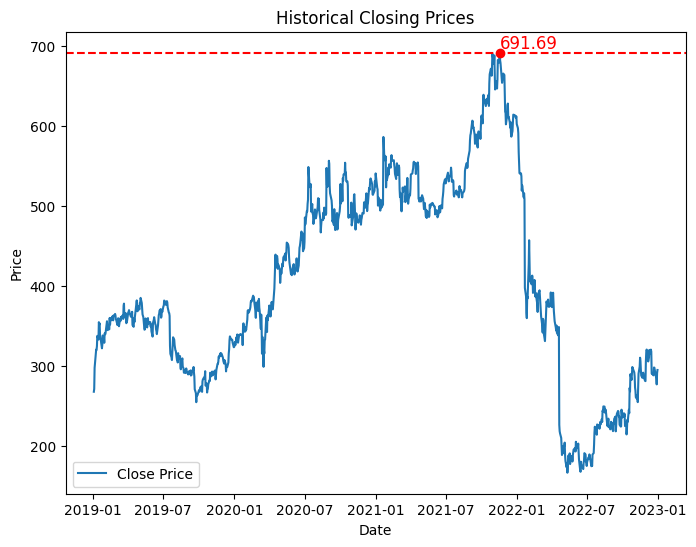

In [4]:
import matplotlib.pyplot as plt
max_price = data['Close'].max()
max_date = data['Close'].idxmax()
plt.figure(figsize=(8,6))
plt.plot(data['Close'], label='Close Price')
plt.title('Historical Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.axhline(max_price, color='r', linestyle='--', label=f'Max Price: {max_price:.2f}')
plt.plot(max_date, max_price, marker='o', color='r')
plt.text(max_date, max_price, f'{max_price:.2f}', fontsize=12, verticalalignment='bottom', color='r')
plt.show()

MAX TRADE VOLUME STOCK

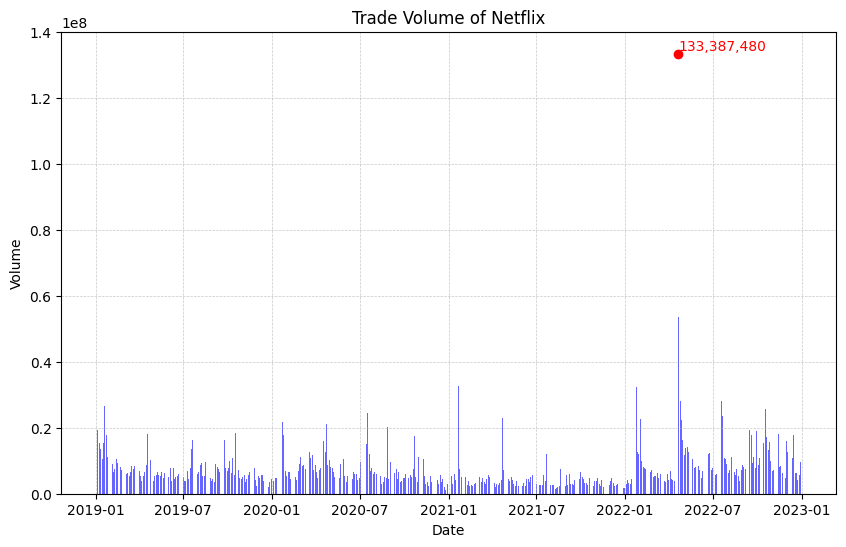

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
max_volume = data['Volume'].max()
max_date = data['Volume'].idxmax()
plt.bar(data.index,data['Volume'],color='blue',alpha=0.6)
plt.title("Trade Volume of Netflix")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.scatter(max_date, max_volume, color='red',zorder=5)
plt.text(max_date, max_volume, f'{max_volume:,}', color='red', verticalalignment='bottom', fontsize=10)
plt.show()

TEST FOR STATIONARY USING ADF TEST

In [6]:
from statsmodels.tsa.stattools import adfuller
adf_result=adfuller(data['Close'])
print("ADF statistic",adf_result[0])
if adf_result[1]<0.05:
    print("The time series is stationary")
else:
    print("The time series is not stationary")

ADF statistic -1.4735511184214347
The time series is not stationary


In [7]:
data['Close_diff']=data['Close'].diff()
data=data.dropna()
adf_result_diff=adfuller(data['Close_diff'])
print("ADF statistic after differencing",adf_result_diff[0])
print("p-value after differencing",adf_result_diff[1])

ADF statistic after differencing -33.09251123103164
p-value after differencing 0.0


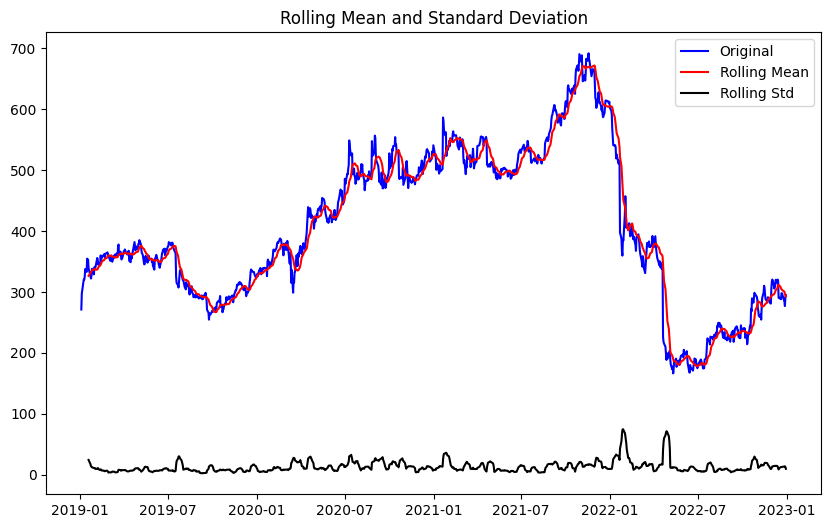

In [8]:
def test_stationarity(timeseries):
    if isinstance(timeseries, pd.DataFrame):
        if timeseries.shape[1] > 1:
            raise ValueError("Input timeseries must be a pandas Series or a single-column DataFrame.")
        else:
            timeseries = timeseries.iloc[:, 0]
    timeseries = timeseries.dropna()
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    plt.figure(figsize=(10, 6))
    plt.plot(timeseries, label='Original', color='blue')
    plt.plot(rolmean, label='Rolling Mean', color='red')
    plt.plot(rolstd, label='Rolling Std', color='black')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show()
test_stationarity(data['Close'])

ARIMA MODEL

In [9]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data['High'], order=(2, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   High   No. Observations:                 1007
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -3778.326
Date:                Sat, 21 Sep 2024   AIC                           7562.653
Time:                        11:48:22   BIC                           7577.394
Sample:                             0   HQIC                          7568.254
                               - 1007                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1086      0.031      3.528      0.000       0.048       0.169
ar.L2         -0.0392      0.030     -1.312      0.189      -0.098       0.019
sigma2       107.0934      1.189     90.086      0.0

LSTM MODEL AND MODEL ACCURACY

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 - 5s - 188ms/step - loss: 0.0555 - val_loss: 0.0094 - learning_rate: 0.0010
Epoch 2/100
24/24 - 1s - 50ms/step - loss: 0.0045 - val_loss: 0.0082 - learning_rate: 0.0010
Epoch 3/100
24/24 - 1s - 53ms/step - loss: 0.0028 - val_loss: 0.0055 - learning_rate: 0.0010
Epoch 4/100
24/24 - 1s - 50ms/step - loss: 0.0024 - val_loss: 0.0041 - learning_rate: 0.0010
Epoch 5/100
24/24 - 1s - 51ms/step - loss: 0.0023 - val_loss: 0.0040 - learning_rate: 0.0010
Epoch 6/100
24/24 - 2s - 73ms/step - loss: 0.0023 - val_loss: 0.0038 - learning_rate: 0.0010
Epoch 7/100
24/24 - 2s - 83ms/step - loss: 0.0025 - val_loss: 0.0044 - learning_rate: 0.0010
Epoch 8/100
24/24 - 2s - 73ms/step - loss: 0.0022 - val_loss: 0.0035 - learning_rate: 0.0010
Epoch 9/100
24/24 - 1s - 50ms/step - loss: 0.0021 - val_loss: 0.0033 - learning_rate: 0.0010
Epoch 10/100
24/24 - 1s - 50ms/step - loss: 0.0019 - val_loss: 0.0033 - learning_rate: 0.0010
Epoch 11/100
24/24 - 1s - 50ms/step - loss: 0.0021 - val_loss: 0.0031 - learning

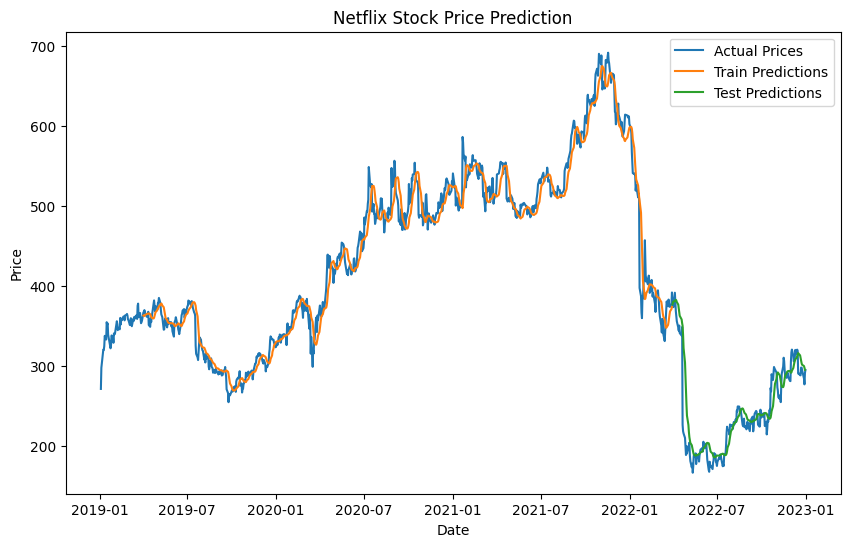

In [20]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
look_back = 60

X, Y = create_dataset(scaled_data, look_back)

train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
train_X, test_X = X[0:train_size], X[train_size:len(X)]
train_Y, test_Y = Y[0:train_size], Y[train_size:len(Y)]

train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.2, min_lr=1e-5)
history = model.fit(train_X, train_Y, epochs=100, batch_size=32, validation_data=(test_X, test_Y),
                    callbacks=[early_stop, reduce_lr], verbose=2)
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)
train_predict = scaler.inverse_transform(train_predict)
train_Y = scaler.inverse_transform(train_Y.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict)
test_Y = scaler.inverse_transform(test_Y.reshape(-1, 1))
train_rmse = math.sqrt(mean_squared_error(train_Y, train_predict))
test_rmse = math.sqrt(mean_squared_error(test_Y, test_predict))
train_mae = mean_absolute_error(train_Y, train_predict)
test_mae = mean_absolute_error(test_Y, test_predict)

print("Root Mean Squared Error for Training set:", train_rmse)
print("Root Mean Squared Error for Test set:", test_rmse)
print("Mean Absolute Error for Training set:", train_mae)
print("Mean Absolute Error for Test set:", test_mae)

plt.figure(figsize=(10, 6))
plt.plot(data.index, scaler.inverse_transform(scaled_data), label='Actual Prices')
plt.plot(data.index[look_back:len(train_predict) + look_back], train_predict, label='Train Predictions')
plt.plot(data.index[len(train_predict) + look_back : len(train_predict) + look_back + len(test_predict)],
         test_predict, label='Test Predictions')

plt.title('Netflix Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


